Na dziszejszych zajęciach mogliśmy poznać jak rozwiązywać problemy liniowe na przykładzie zadań z elektrotechniki

Zadanie 1

Dla układu mostka przedstawionego poniżej należy dobrać odpowiednie wartości rezystorów oraz moc wydzielana przez nasz układ.
Aby wykonać powyższe założenia należy uwzględnić znane wartości napięć oraz maksymalne  wartości prądów na poszczególnych elemntach
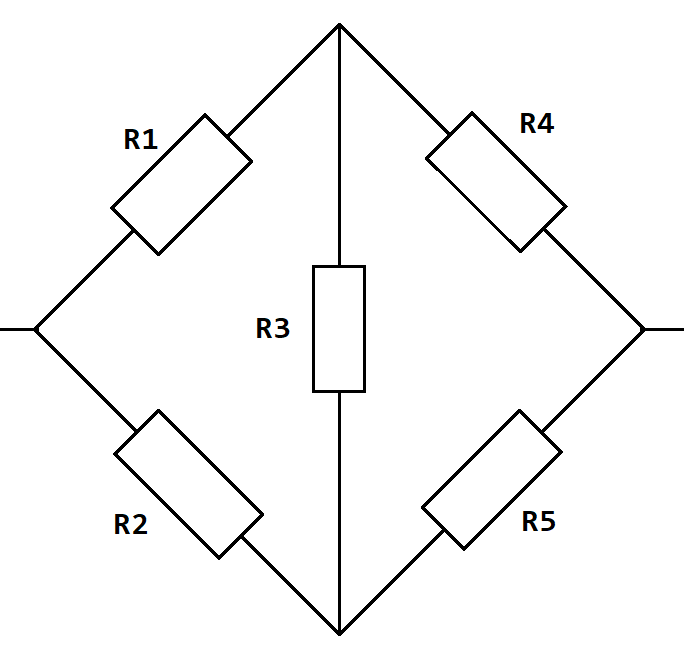

Dane:

R1;6V;4mA

R2;10V;2mA

R3;4V;2mA

R4;7V;2mA

R5;3V;4mA

In [1]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp

     |████████████████████████████████| 40.6MB 109kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5
  coinor-libosi1v5 libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
Suggested packages:
  libiodbc2-dev default-libmysqlclient-dev
The following NEW packages will be installed:
  coinor-cbc coinor-clp coinor-libcbc3 coinor-libcgl1 coinor-libclp1
  coinor-libcoinutils3v5 coinor-libosi1v5 glpk-utils libamd2 libcolamd2
  libglpk40 libsuitesparseconfig5
0 upgraded, 12 newly installed, 0 to remove and 15 not upgraded.
Need to get 3,439 kB of archives.
After this operation, 9,832 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsuitesparseconfig5 amd64 1:5.1.2-2 [9,044 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libamd2 amd64 1:5.1.2-2 [19.5 kB]
Get:3 

In [11]:
from pulp import *

Prądy = ['i1', 'i2', 'i3', 'i4', 'i5']
Napięcia = {'i1':6,'i2':10,'i3':4,'i4':7,'i5':3}
Limit = {'i1':4,'i2':2,'i3':2,'i4':2,'i5':4}
delta = 1

prob = LpProblem("Mostek",LpMinimize)
i_vars = LpVariable.dicts("",Prądy,0)

prob += lpSum([Napięcia[i]*i_vars[i] for i in Prądy]),"Moc"

prob += lpSum([i_vars['i1'],-i_vars['i4'],-i_vars['i3']]) == 0
prob += lpSum([i_vars['i2'],-i_vars['i5'],i_vars['i3']]) == 0
prob += lpSum([i_vars['i5'],i_vars['i4'],-i_vars['i2'],-i_vars['i1']]) == 0

for i in Prądy:
 prob += i_vars[i] >= Limit[i] - delta, "{}_min".format(i)
 prob += i_vars[i] <= Limit[i] + delta, "{}_max".format(i)

prob.solve()
i = 0
for v in prob.variables():
    print("R{} = {}kΩ ({}mA)".format(i+1,Napięcia['i'+str(i+1)]/v.varValue,v.varValue))
    i+=1
print("Moc mostka ")
print(str(prob.objective.value()) + 'mW')


R1 = 2.0kΩ (3.0mA)
R2 = 10.0kΩ (1.0mA)
R3 = 2.0kΩ (2.0mA)
R4 = 7.0kΩ (1.0mA)
R5 = 1.0kΩ (3.0mA)
Moc mostka 
52.0mW


Zadanie 2

Dla układu dwójnika przedstawionego poniżej należy dobrać odpowiednie wartości rezystorów oraz określić jaki maksymalny prąd może płynąć przez ten dwójnik.
Aby to obliczyć należy uwzględnić maksymalne prądy na poszczehólnych elementach.

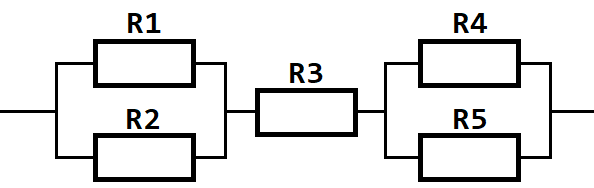

Dane:

Gałęź 1;8 Ohm; 2A

Gałęź 2;6 Ohm; 3A

Gałęź 3;4 Ohm; 4A

Gałęź 4;10 Ohm; 2A

Gałęź 5;8 Ohm; 2A

In [23]:
from pulp import *

Prądy = ['i1', 'i2', 'i3', 'i4', 'i5']
Limit = [2,3,4,2,2]
Rezystor = [8,6,4,10,8]

prob = LpProblem("Układ",LpMaximize)

i_vars = LpVariable.dicts("Prądy",Prądy,0)


prob += i_vars['i3']

# Równania wynikające z praw Kirhoffa
prob += i_vars['i1'] + i_vars['i2'] - i_vars['i3'] == 0, 
prob += i_vars['i3'] - i_vars['i4'] - i_vars['i5'] == 0, 
prob += i_vars['i1']*Rezystor[0] == i_vars['i2']*Rezystor[1], 
prob += i_vars['i4']*Rezystor[3] == i_vars['i5']*Rezystor[4], 

for i, val in enumerate(Prądy):
    prob += i_vars[val] <= Limit[i]

prob.solve()
results = [];

for v in prob.variables():
    results.append(v.varValue)

print('Prąd w poszczególnych gałęziach:')
for i in range(len(results)):
    print(Prądy[i] + ' = ' + str(results[i])  + ' A')

print('Maksymalny prad dwójnika:')

print(str(prob.objective.value()) + 'A')

Prąd w poszczególnych gałęziach:
i1 = 1.5428571 A
i2 = 2.0571429 A
i3 = 3.6 A
i4 = 1.6 A
i5 = 2.0 A
Maksymalny prad dwójnika:
3.6A
